## XOR perceptron

Creating a neural network to solve the XOR function is a classic problem in machine learning, showcasing how non-linear problems can be solved with neural networks.


In [ ]:
import torch
import torch.nn as nn

In [ ]:
# define "perceptron"
# a network that takes two input 'units' and produces a single output 'unit'
perceptron = nn.Linear(2, 1)
perceptron

Linear(in_features=2, out_features=1, bias=True)

In [ ]:
?nn.Linear

In [ ]:
perceptron = list(perceptron.parameters())  # returns weights and biases
perceptron

[Parameter containing:
 tensor([[ 0.1602, -0.6388]], requires_grad=True), Parameter containing:
 tensor([-0.0024], requires_grad=True)]

In [ ]:
# We have as many weights as we have input units
print('Perceptron Weights : ', perceptron[0][0].data.numpy())

Perceptron Weights :  [ 0.16023423 -0.638827  ]


In [ ]:
# Q: How many bias terms would we have if we double the size of the input units?
print('Perceptron Bias :', perceptron[1].data.numpy())

Perceptron Bias : [-0.00239065]


## Input data

In [ ]:
import torch
import torch.nn as nn

# create data
# start creating the the table for XOR, broken down in Xs and y
Xs = torch.Tensor([[0., 0.],
                   [0., 1.],
                   [1., 0.],
                   [1., 1.]])

y = torch.Tensor([__, __, __, _]).reshape(Xs.shape[0], 1)
# Q: do you remember the tables for y = AND, y = OR?
#   how would you represent them?

TypeError: ignored

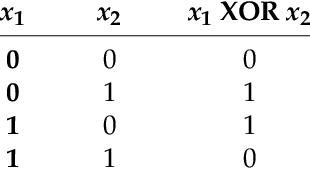

In [ ]:
# Check out this this distinction, sometimes we do need singleton dimensions
# this is a mild-annoyance from PyTorch's syntax
torch.Tensor([1., 1., 1., 1.]).shape, y.shape

In [ ]:
Xs

In [ ]:
y

In [ ]:
?nn.Sigmoid()

In [ ]:
??nn.ReLU()

## Create Multilayer Perceptron to Compute XOR, AND, OR

In [ ]:
# LOGIC is a subclass of nn.Module
class LOGIC(nn.Module):
    def __init__(self):
        # here we define the network architecture
        super(LOGIC, self).__init__()
        #nn.Linear is a fully connected layer
        self.linear = nn.Linear(2, 2)
        # nn.Sigmoid is a sigmoid activation
        # Q: which activations functions can we use?
        self.activation_function = nn.ReLU()
        self.linear2 = nn.Linear(2, 1)
    # here we define the forward pass
    def forward(self, input):
        x = self.linear(input)
        activation = self.activation_function(x)
        # Q: what happens if we skip the sigmoid (or ReLU)? Try feeding x to the next function.
        yh = self.linear2(activation)
        # Q: what happens if we return activation instead of yh?
        return __

In [ ]:
logic_network = LOGIC()
# Q: what is an epoch?
epochs = 1000
mseloss = nn.MSELoss()
# The optimizer will perform gradient descent using the network's weights
# and a given learning rate
optimizer = torch.optim.Adam(logic_network.parameters(), lr = 0.03)
all_losses = []
current_loss = 0
print_every = 50

for epoch in range(epochs):

    # input training example and return the prediction
    yhat = logic_network.forward(Xs)

    # calculate Mean Squared Error loss of our prediction
    loss = mseloss(yhat, y)

    # backpropagate to obtain all gradients in the weight layers
    loss.backward()

    # update model weights
    optimizer.step()

    import pdb; pdb.set_trace()
    # remove current gradients for next iteration
    optimizer.zero_grad()

    # append to loss
    current_loss += loss

    if epoch % print_every == 0:
        all_losses.append(current_loss / print_every)
        current_loss = 0

    # print progress
    if epoch % 500 == 0:
        print(f'Epoch: {epoch} completed')




In [ ]:
all_losses

In [ ]:
# test input
input = torch.tensor([0., 0.])
out = logic_network(input)
out.round()

In [ ]:
input = torch.tensor([1., 1.])
out = logic_network(input)
out.round()

In [ ]:
input = torch.tensor([0., 1.])
out = logic_network(input)
out.round()

In [ ]:
input = torch.tensor([1., 0.])
out = logic_network(input)
out.round()

In [ ]:
import matplotlib.pyplot as plt

with torch.no_grad():
  plt.plot(all_losses)
  plt.ylabel('Loss')
  plt.show()